In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 20.0 MB/s eta 0:00:00


In [3]:
import py7zr

archive = py7zr.SevenZipFile('/kaggle/input/cifar-10/train.7z', mode='r')
archive.extractall()  
archive.close()

# Importing the Libraries

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [5]:
filenames = os.listdir('/kaggle/working/train')

In [6]:
type(filenames)

list

In [7]:
len(filenames)

50000

In [8]:
print(filenames[0:5])
print(filenames[-5:])

['1902.png', '28494.png', '33825.png', '8446.png', '2739.png']
['36372.png', '2502.png', '29379.png', '24182.png', '13073.png']


# Labels Processing

In [9]:
labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [10]:
labels_df.shape

(50000, 2)

In [11]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [12]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [13]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [14]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [15]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [16]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [17]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [18]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


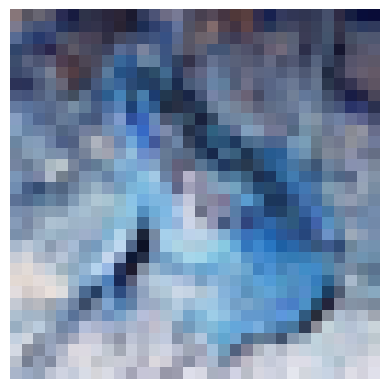

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('/kaggle/working/train/7796.png')


# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


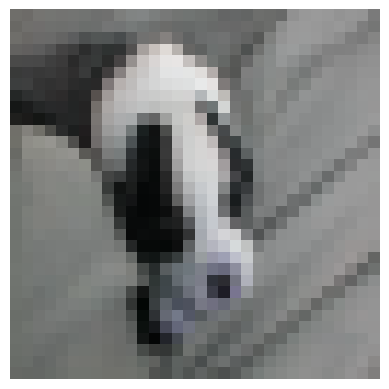

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('/kaggle/working/train/45888.png')


# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [21]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [22]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
id_list = list(labels_df['id'])

# Image Processing

In [24]:
# convert images to numpy arrays

train_data_folder = '/kaggle/working/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [25]:
type(data)

list

In [26]:
len(data)

50000

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(32, 32, 3)

In [29]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


# Train Test Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [35]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [37]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

# Building the Neural Network

In [38]:
import tensorflow as tf
from tensorflow import keras

2024-08-22 02:40:26.007746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 02:40:26.007862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 02:40:26.131189: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
  89/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1426 - loss: 2.4434

I0000 00:00:1724294440.649177     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724294440.667622     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2311 - loss: 2.1124 - val_acc: 0.3330 - val_loss: 1.8453
Epoch 2/10


W0000 00:00:1724294443.210407     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3271 - loss: 1.8666 - val_acc: 0.3402 - val_loss: 1.8279
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3452 - loss: 1.8124 - val_acc: 0.3560 - val_loss: 1.7878
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3531 - loss: 1.7942 - val_acc: 0.3650 - val_loss: 1.7711
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3616 - loss: 1.7803 - val_acc: 0.3683 - val_loss: 1.7604
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3641 - loss: 1.7779 - val_acc: 0.3697 - val_loss: 1.7650
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3766 - loss: 1.7480 - val_acc: 0.3638 - val_loss: 1.7390
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3795 - loss: 1.7345 - val_acc: 0.3615 - val_loss: 1.7596
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3838 - loss: 1.7279 - val_acc: 0.3670 - val_loss: 1.7819
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

# ResNet50

In [42]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [43]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [44]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [45]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5), 
    loss='sparse_categorical_crossentropy', 
    metrics=['acc']
)


In [46]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 463s 349ms/step - acc: 0.3255 - loss: 2.0425 - val_acc: 0.7625 - val_loss: 0.8665
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.6840 - loss: 1.0507 - val_acc: 0.8775 - val_loss: 0.4940
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.8034 - loss: 0.7397 - val_acc: 0.9178 - val_loss: 0.3250
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.8663 - loss: 0.5658 - val_acc: 0.9310 - val_loss: 0.2730
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.9042 - loss: 0.4526 - val_acc: 0.9367 - val_loss: 0.2468
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.9357 - loss: 0.3440 - val_acc: 0.9333 - val_loss: 0.2477
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.9499 - loss: 0.2849 - val_acc: 0.9427 - val_loss: 0.2192
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - acc: 0.9618 - loss: 0.2379 - val_acc: 0.9425 - val_loss: 0.2132
Epoch 9/

In [47]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - acc: 0.9337 - loss: 0.2347
Test Accuracy = 0.935699999332428


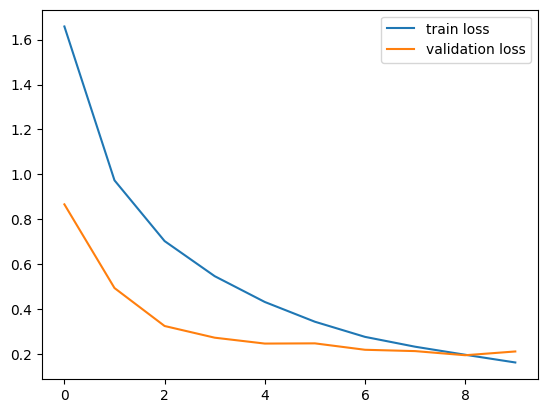

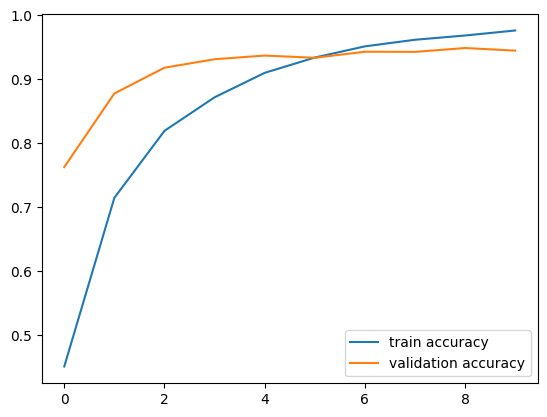

In [48]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 461s 353ms/step - acc: 0.3531 - loss: 1.8911 - val_acc: 0.5742 - val_loss: 1.1870
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 392s 348ms/step - acc: 0.6235 - loss: 1.1187 - val_acc: 0.6083 - val_loss: 1.1285
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 348ms/step - acc: 0.6885 - loss: 0.9306 - val_acc: 0.6842 - val_loss: 0.9110
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 348ms/step - acc: 0.7342 - loss: 0.8201 - val_acc: 0.7095 - val_loss: 0.8302
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 347ms/step - acc: 0.7631 - loss: 0.7365 - val_acc: 0.7950 - val_loss: 0.6231
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 348ms/step - acc: 0.7779 - loss: 0.7009 - val_acc: 0.7805 - val_loss: 0.6395
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 390s 347ms/step - acc: 0.8176 - loss: 0.5784 - val_acc: 0.8210 - val_loss: 0.5532
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.8221 - loss: 0.5640 - val_acc: 0.8190 - val_loss: 0.5444
Epoch 9/

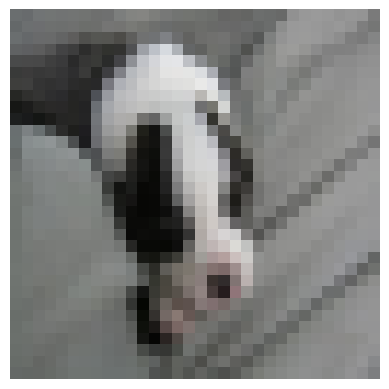

In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50

# Define the number of classes
num_of_classes = 10

# Set up the model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Assuming X_train_scaled and Y_train are defined and preprocessed
# Train the model
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

# Function to preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))  # Resize to match model input
    img = img / 255.0  # Scale pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to make predictions
def predict_image(image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0]

# Example usage
image_path = '/kaggle/working/train/45888.png'  # Replace with your image path
predicted_class = predict_image(image_path)

# Mapping predicted class to label
labels_dictionary = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 
                     4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 
                     8: 'ship', 9: 'truck'}

print(f'The predicted class for the image is: {labels_dictionary[predicted_class]}')

# Display the image
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()


In [57]:
# Save the model in HDF5 format
model.save('Objmodel.h5')